<a href="https://colab.research.google.com/github/chenansc14-rgb/Chen-chung-an/blob/main/week%201%20homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Runge Phenomenon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

In [2]:
def f(x):
    return 1 / (1 + x**2)

In [3]:
a, b = -5, 5
x = np.linspace(a, b, 1000)
y = f(x)


In [4]:
n_values = [10,100, 1000]

plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31680 (\N{CJK UNIFIED IDEOGRAPH-7BC0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


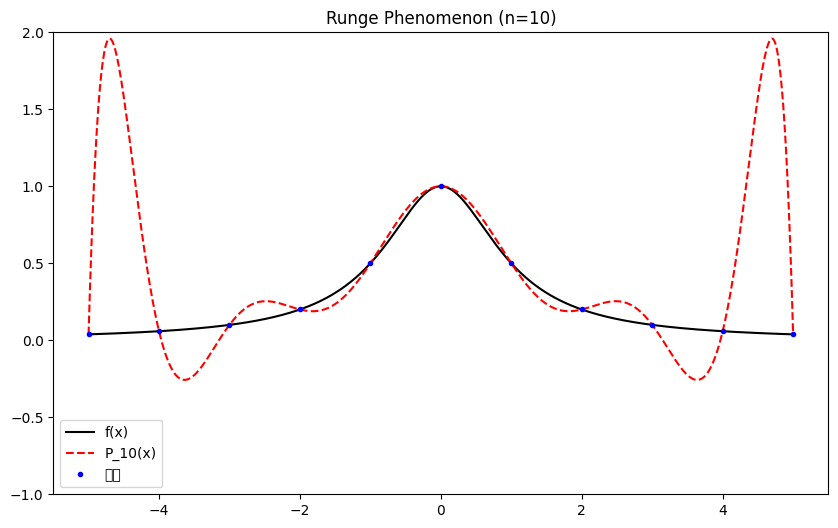

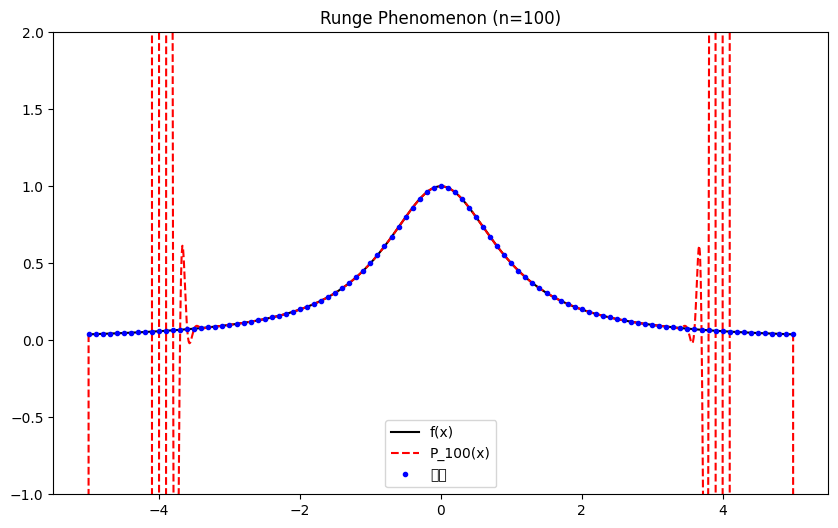

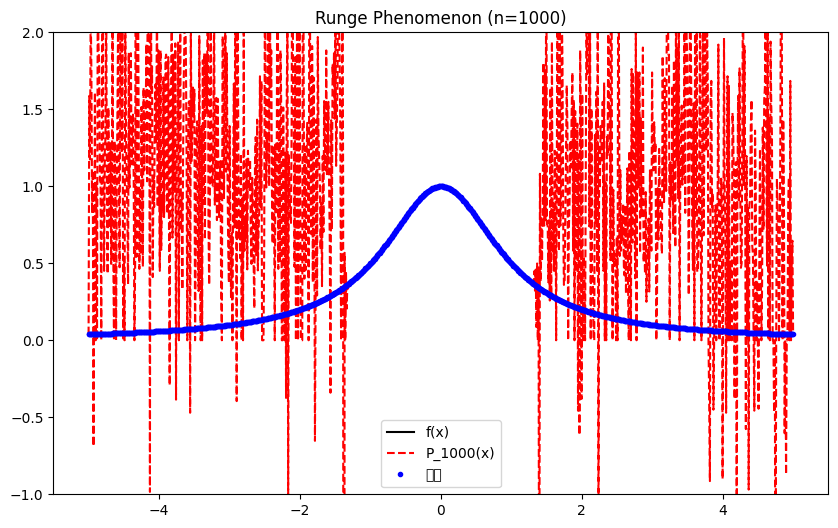

In [5]:
for n in n_values:
    plt.figure(figsize=(10, 6))
    nodes = np.linspace(a, b, n+1)
    values = f(nodes)

    interpolator = BarycentricInterpolator(nodes, values)
    y_poly = interpolator(x)

    plt.plot(x, y, 'k-', label="f(x)")
    plt.plot(x, y_poly, 'r--', label=f"P_{n}(x)")
    plt.plot(nodes, values, 'bo', markersize=3, label="節點")
    plt.title(f"Runge Phenomenon (n={n})")
    plt.ylim(-1, 2)
    plt.legend()
    plt.show()

# interploting polynomial of f(x)=sin(x)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator


In [7]:
def h(x):
    return np.sin(x)

In [31]:
a, b = 0, 1
n_values = [100,1000,10000]


# Barycentric interpolator

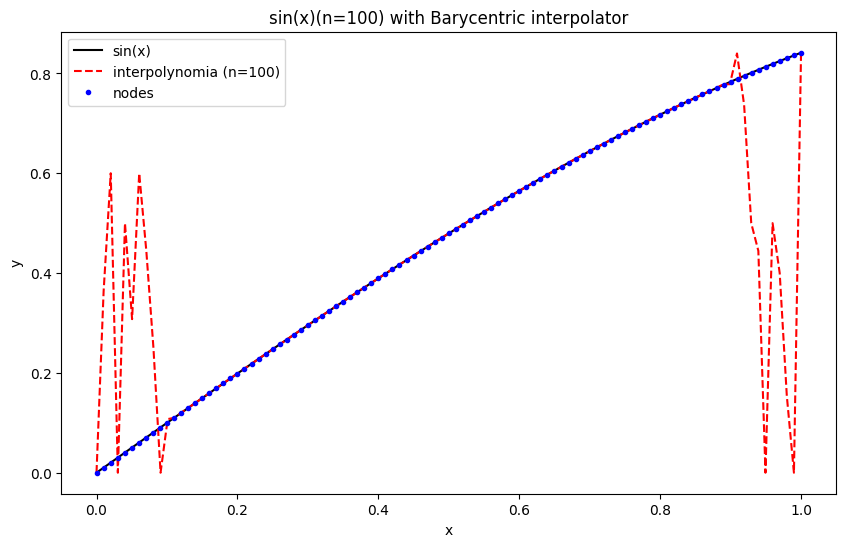

In [34]:
a, b = 0, 1
n = 100
x_nodes = np.linspace(a, b, n+1)
y_nodes = h(x_nodes)
interp = BarycentricInterpolator(x_nodes, y_nodes)

x = np.linspace(a, b, 100)
y_true = h(x)
y_interp = interp(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, 'k-', label="sin(x)")
plt.plot(x, y_interp, 'r--', label=f"interpolynomia (n={n})")
plt.plot(x_nodes, y_nodes, 'bo', markersize=3, label="nodes")
plt.title(f"sin(x)(n={n}) with Barycentric interpolator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

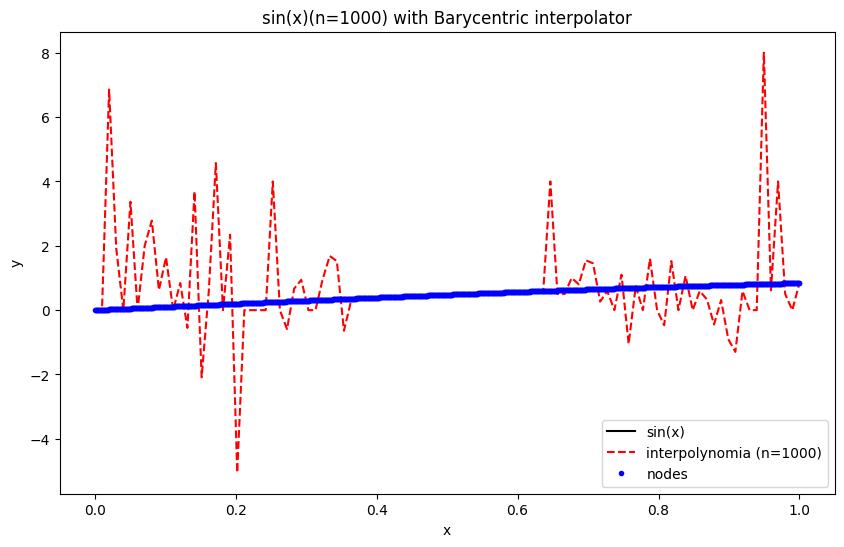

In [26]:
a, b = 0, 1
n = 1000
x_nodes = np.linspace(a, b, n+1)
y_nodes = h(x_nodes)
interp = BarycentricInterpolator(x_nodes, y_nodes)

x = np.linspace(a, b, 100)
y_true = h(x)
y_interp = interp(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, 'k-', label="sin(x)")
plt.plot(x, y_interp, 'r--', label=f"interpolynomia (n={n})")
plt.plot(x_nodes, y_nodes, 'bo', markersize=3, label="nodes")
plt.title(f"sin(x)(n={n}) with Barycentric interpolator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

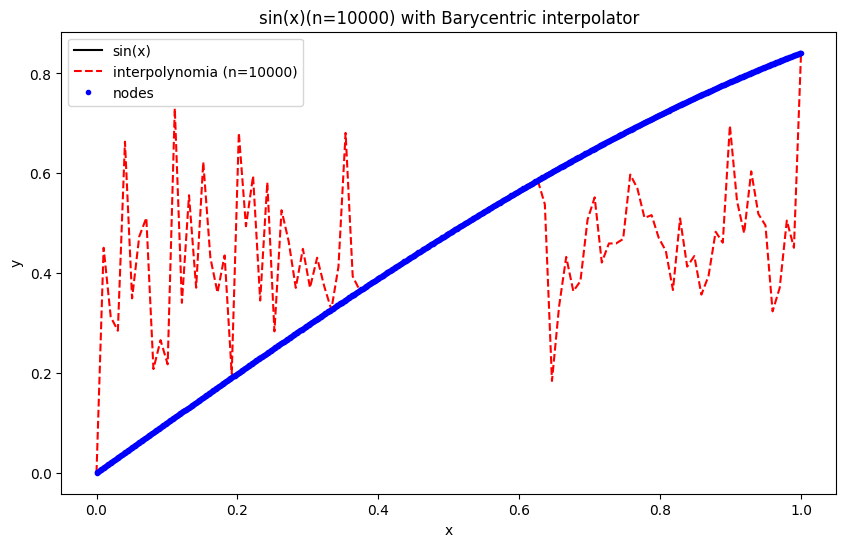

In [23]:
a, b = 0, 1
n = 10000
interp = BarycentricInterpolator(x_nodes, y_nodes)

x = np.linspace(a, b, 100)
y_true = h(x)
y_interp = interp(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, 'k-', label="sin(x)")
plt.plot(x, y_interp, 'r--', label=f"interpolynomia (n={n})")
plt.plot(x_nodes, y_nodes, 'bo', markersize=3, label="nodes")
plt.title(f"sin(x)(n={n}) with Barycentric interpolator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# lagrange interploting


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange


In [3]:
def g(x):
    return np.sin(x)

In [4]:
a, b = 0.0, 1.0
n_points = 100
x_nodes = np.linspace(a, b, n_points, dtype=np.float64)
y_nodes = g(x_nodes)

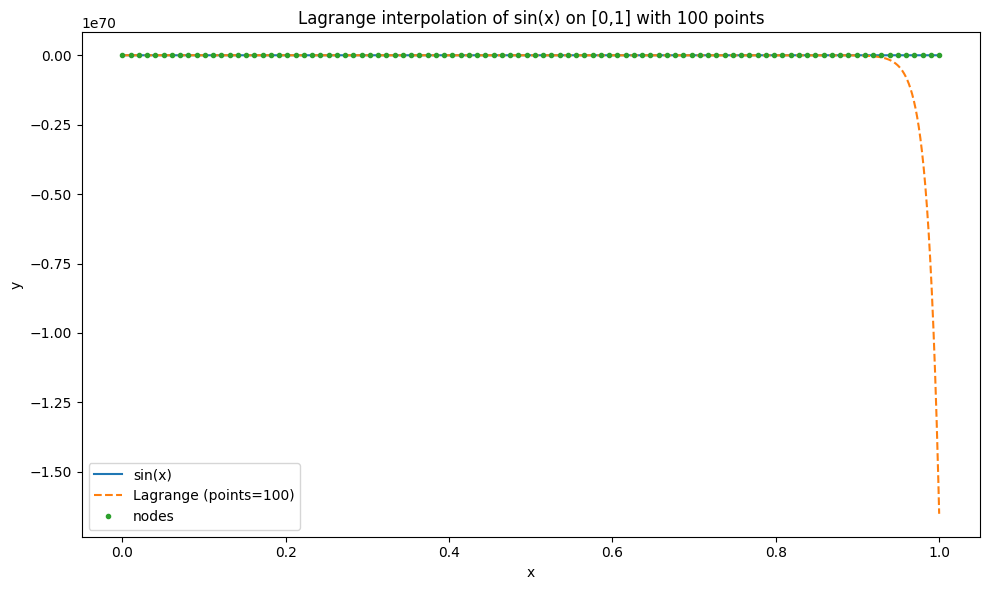

In [5]:
poly = lagrange(x_nodes, y_nodes)

x = np.linspace(a, b, 2000, dtype=np.float64)
y_true = g(x)
y_interp = poly(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label="sin(x)")
plt.plot(x, y_interp, "--", label=f"Lagrange (points={n_points})")
plt.plot(x_nodes, y_nodes, "o", markersize=3, label="nodes")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lagrange interpolation of sin(x) on [0,1] with 100 points")
plt.legend()
plt.tight_layout()
plt.show()

# Newton interploting

In [12]:
def newton_divided_differences(x_nodes, y_nodes):
    x = np.asarray(x_nodes, dtype=np.float64)
    coef = np.asarray(y_nodes, dtype=np.float64).copy()
    n = len(x)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef


In [13]:
def newton_eval(x_nodes, coef, x_eval):
    x = np.asarray(x_eval, dtype=np.float64)
    p = np.full_like(x, coef[-1], dtype=np.float64)
    for k in range(len(coef) - 2, -1, -1):
        p = coef[k] + (x - x_nodes[k]) * p
    return p


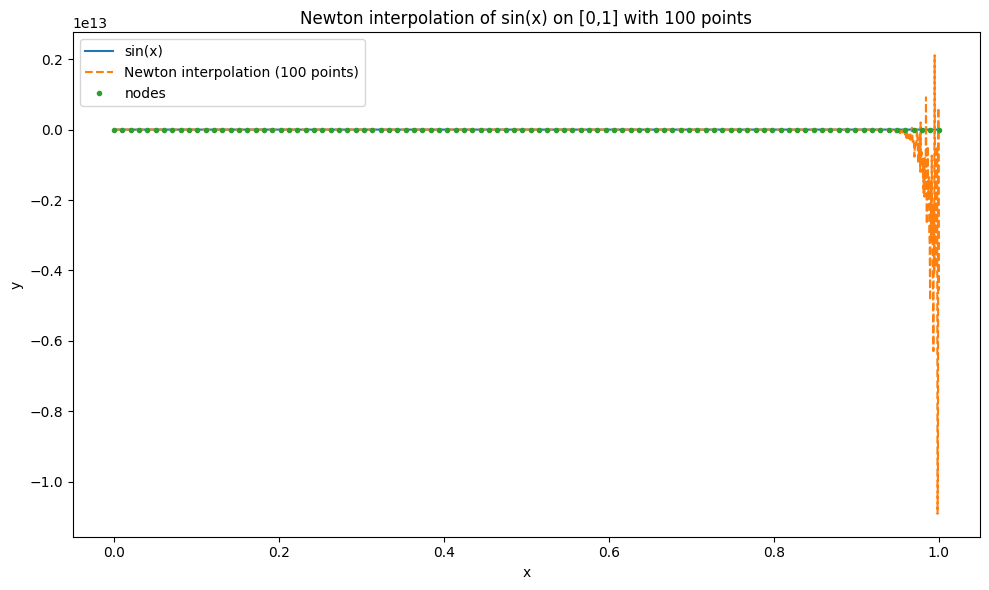

In [15]:
def f(x):
    return np.sin(x)

a, b = 0.0, 1.0
n_points = 100
x_nodes = np.linspace(a, b, n_points, dtype=np.float64)
y_nodes = f(x_nodes)

coef = newton_divided_differences(x_nodes, y_nodes)

x = np.linspace(a, b, 2000, dtype=np.float64)
y_true = f(x)
y_interp = newton_eval(x_nodes, coef, x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label="sin(x)")
plt.plot(x, y_interp, "--", label=f"Newton interpolation ({n_points} points)")
plt.plot(x_nodes, y_nodes, "o", markersize=3, label="nodes")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Newton interpolation of sin(x) on [0,1] with 100 points")
plt.legend(); plt.tight_layout(); plt.show()